In [ ]:
import pandas as pd

df = pd.read_csv('/content/data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   book_title     3048 non-null   object 
 1   genre          3048 non-null   object 
 2   pages          3028 non-null   float64
 3   rating         3048 non-null   float64
 4   ratings_count  3048 non-null   int64  
 5   reviews_count  3048 non-null   int64  
 6   comment_text   3048 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 166.8+ KB


In [ ]:
len(df['book_title'].unique())

143

In [ ]:
df['genre'].unique()

array(['art', 'science', 'biography', 'comics', 'history', 'business',
       'christian', 'classics', 'cookbooks', 'fiction', 'fantasy',
       'graphic novels'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['book_id'] = le.fit_transform(df['book_title'])


In [ ]:
null_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
null_perc = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_count, null_perc], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage
pages,20,0.656168


In [ ]:
df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3028 entries, 0 to 3047
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   book_title     3028 non-null   object 
 1   genre          3028 non-null   object 
 2   pages          3028 non-null   float64
 3   rating         3028 non-null   float64
 4   ratings_count  3028 non-null   int64  
 5   reviews_count  3028 non-null   int64  
 6   comment_text   3028 non-null   object 
 7   book_id        3028 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 212.9+ KB


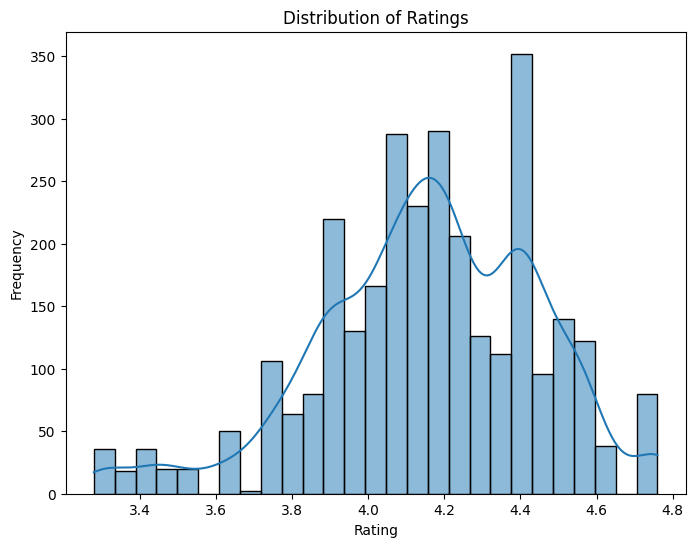

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [ ]:
top_10_books = df.groupby(['book_id', 'book_title'])['rating'].mean().reset_index()
top_10_books = top_10_books.sort_values(by='rating', ascending=False).head(10)
top_10_books

,book_id,book_title,rating
120,121,The One Who Changed Everything,4.76
63,63,Ocean: Earth’s Last Wilderness,4.76
67,67,Poets Square: A Memoir in Thirty Cats,4.74
56,56,Matriarch: A Memoir,4.65
104,105,"The Fate of the Day: The War for America, Fort...",4.60
135,136,Warriors Graphic Novel: The Prophecies Begin #2,4.59
70,70,RecipeTin Eats Dinner,4.58
1,1,A Drop of Corruption,4.57
82,83,So Very Small: How Humans Discovered the Micro...,4.56
48,48,John & Paul: A Love Story in Songs,4.55


In [ ]:

top_10_books = df.groupby(['book_id', 'book_title']).agg({
    'rating': 'mean',
    'pages': 'mean'
}).reset_index()


book_genres = (
    df.groupby('book_id')['genre']
    .agg(lambda x: x.value_counts().index[0])
    .reset_index()
)


top_10_books = top_10_books.merge(book_genres, on='book_id', how='left')


top_10_books = top_10_books.sort_values(by='rating', ascending=False).head(10)

top_10_books


,book_id,book_title,rating,pages,genre
120,121,The One Who Changed Everything,4.76,308.0,christian
63,63,Ocean: Earth’s Last Wilderness,4.76,400.0,science
67,67,Poets Square: A Memoir in Thirty Cats,4.74,256.0,biography
56,56,Matriarch: A Memoir,4.65,432.0,biography
104,105,"The Fate of the Day: The War for America, Fort...",4.60,880.0,history
135,136,Warriors Graphic Novel: The Prophecies Begin #2,4.59,272.0,graphic novels
70,70,RecipeTin Eats Dinner,4.58,372.0,cookbooks
1,1,A Drop of Corruption,4.57,465.0,fantasy
82,83,So Very Small: How Humans Discovered the Micro...,4.56,448.0,science
48,48,John & Paul: A Love Story in Songs,4.55,424.0,art


Books have pages from 250 to 500, tend to get higher rating.

In [ ]:
top_10_books = df.groupby(['book_id', 'book_title'])['pages'].mean().reset_index()
book_genres = df[['book_id', 'genre']].drop_duplicates()
top_10_books = top_10_books.merge(book_genres, on='book_id', how='left')
top_10_books = top_10_books.sort_values(by='pages', ascending=False).head(20)
top_10_books


,book_id,book_title,pages,genre
128,105,"The Fate of the Day: The War for America, Fort...",880.0,history
4,4,Allies at War: How the Struggles Between the A...,672.0,history
126,103,The Determined Spy: The Turbulent Life and Tim...,656.0,biography
125,103,The Determined Spy: The Turbulent Life and Tim...,656.0,history
79,65,On Air: The Triumph and Tumult of NPR,576.0,business
96,79,"Shots Heard Round the World: America, Britain,...",560.0,history
158,129,The Wind Weaver,544.0,fantasy
57,47,Jane Eyre,532.0,classics
89,73,"Rethinking Medications: Truth, Power, and the ...",512.0,science
40,32,Gifted & Talented,512.0,fiction


These books have many pages, because they targets at adults or mature readers, who typically engage with complex ideas or long narratives

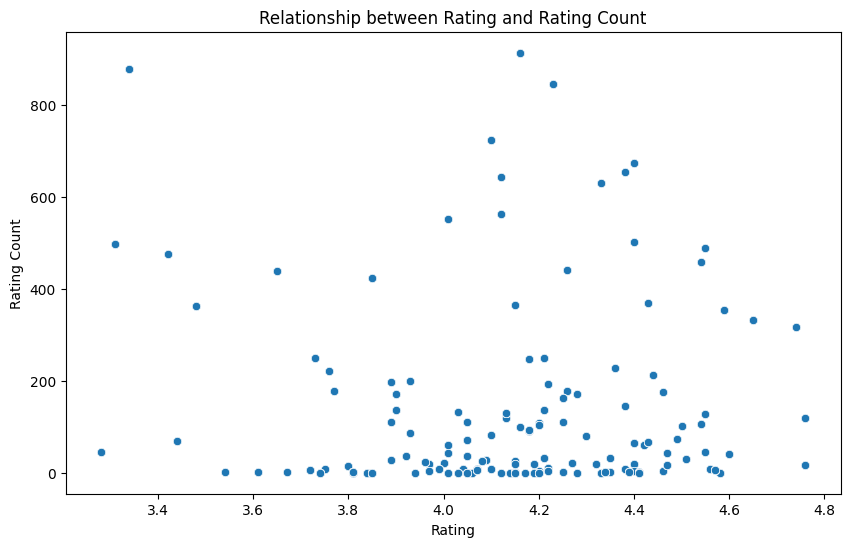

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='ratings_count', data=df)
plt.title('Relationship between Rating and Rating Count')
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.show()


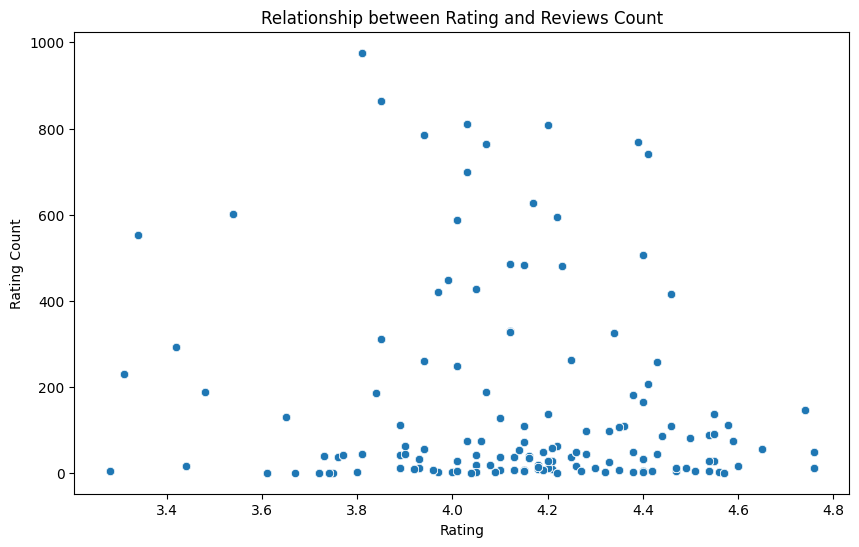

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='reviews_count', data=df)
plt.title('Relationship between Rating and Reviews Count')
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.show()


Books that are evaluated highly, tend to have lower rating and review counts.

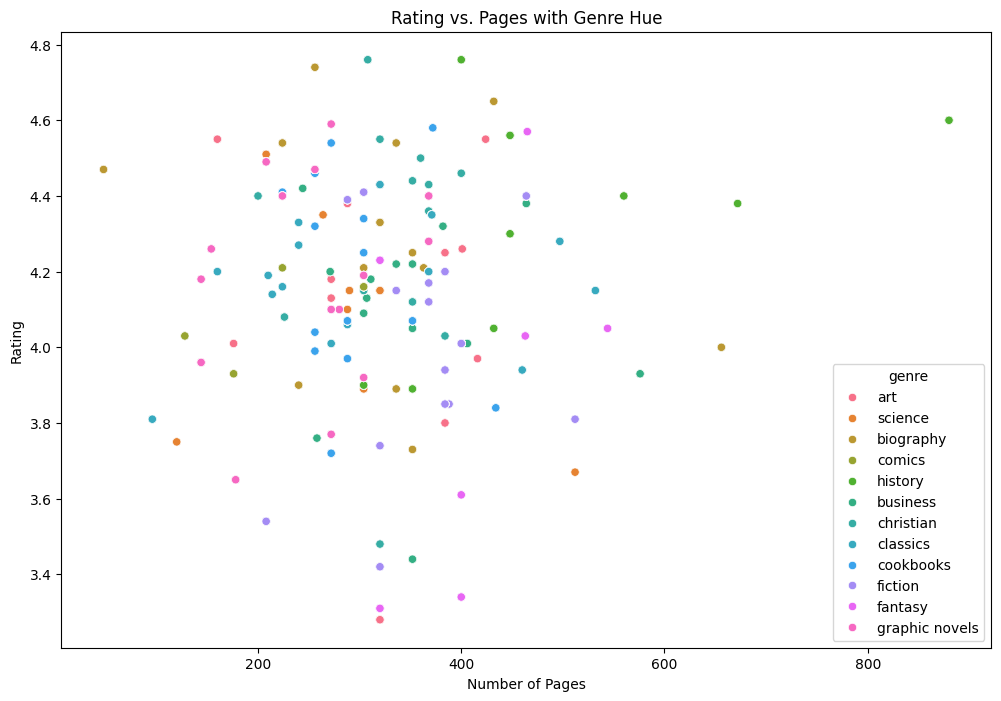

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='pages', y='rating', hue='genre', data=df)
plt.title('Rating vs. Pages with Genre Hue')
plt.xlabel('Number of Pages')
plt.ylabel('Rating')
plt.show()


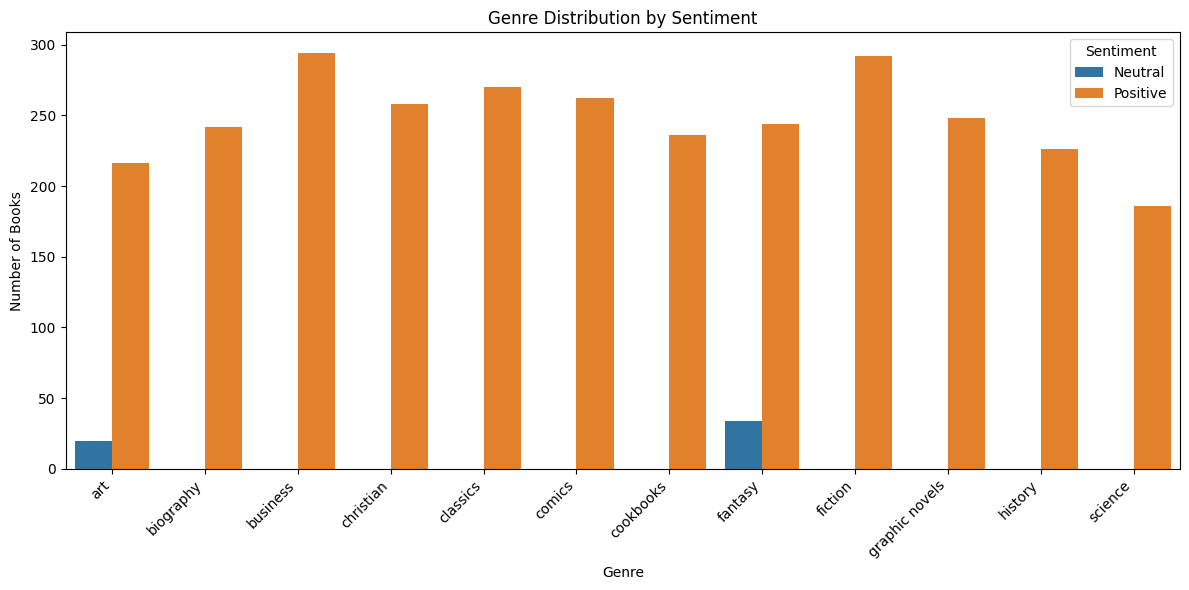

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_sentiment(rating):
    if rating <= 2.4:
        return 'Negative'
    elif 2.4 < rating <= 3.4:
        return 'Neutral'
    elif 3.4 < rating <= 5.0:
        return 'Positive'


df['sentiment'] = df['rating'].apply(get_sentiment)

genre_sentiment_counts = df.groupby(['genre', 'sentiment']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sentiment_counts, x='genre', y='count', hue='sentiment')
plt.xticks(rotation=45, ha='right')
plt.title('Genre Distribution by Sentiment')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


We can see that the majority of the ratings are positive. This can influence the sentiment label expressed in the comments.